<a href="https://colab.research.google.com/github/Ezzaldin97/pytorch-coding/blob/main/pyTorch_DL_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader 
import matplotlib.pyplot as plt

In [20]:
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
INPUT_SIZE = 784
HIDDEN_SIZE = 100
CLASSES = 10
EPOCHS = 10
LR = 0.01
BATCH_SIZE = 100

In [10]:
train_data = torchvision.datasets.MNIST(root = "./sample_data", train = True,
                                        transform = torchvision.transforms.ToTensor(),
                                        download = True)
test_data = torchvision.datasets.MNIST(root = "./sample_data", train = False,
                                        transform = torchvision.transforms.ToTensor())
train_loader = DataLoader(dataset = train_data,
                          batch_size = BATCH_SIZE,
                          shuffle = True)
test_loader = DataLoader(dataset = test_data,
                          batch_size = BATCH_SIZE,
                          shuffle = False)
examples = iter(train_loader)
features, labels = next(examples)
print(features.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


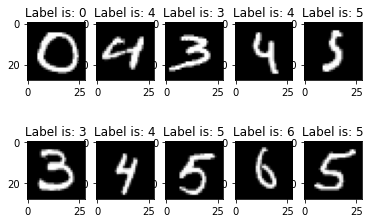

In [12]:
for idx in range(10):
  plt.subplot(2, 5, idx+1)
  plt.imshow(features[idx][0], cmap = "gray")
  plt.title(f"Label is: {labels[idx]}")

In [33]:
class NN(nn.Module):
  def __init__(self, hidden_size, in_size, n_classes):
    super(NN, self).__init__()
    self.l1 = nn.Linear(in_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, n_classes)
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [34]:
model = NN(HIDDEN_SIZE, INPUT_SIZE, CLASSES).to(device)

In [35]:
loss = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = LR)
n_total_steps = len(train_loader)
for epoch in range(EPOCHS):
  for idx, (features, labels) in enumerate(train_loader):
    # reshape image to 100, 784
    features = features.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(features)
    l = loss(outputs, labels)
    opt.zero_grad()
    l.backward()
    opt.step()
    if (idx+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{EPOCHS}], Step [{idx+1}/{n_total_steps}], Loss: {l.item():.4f}')

Epoch [1/10], Step [100/600], Loss: 0.1065
Epoch [1/10], Step [200/600], Loss: 0.2298
Epoch [1/10], Step [300/600], Loss: 0.1135
Epoch [1/10], Step [400/600], Loss: 0.2268
Epoch [1/10], Step [500/600], Loss: 0.1272
Epoch [1/10], Step [600/600], Loss: 0.1546
Epoch [2/10], Step [100/600], Loss: 0.0401
Epoch [2/10], Step [200/600], Loss: 0.0601
Epoch [2/10], Step [300/600], Loss: 0.0329
Epoch [2/10], Step [400/600], Loss: 0.1611
Epoch [2/10], Step [500/600], Loss: 0.1033
Epoch [2/10], Step [600/600], Loss: 0.1460
Epoch [3/10], Step [100/600], Loss: 0.1077
Epoch [3/10], Step [200/600], Loss: 0.0846
Epoch [3/10], Step [300/600], Loss: 0.1278
Epoch [3/10], Step [400/600], Loss: 0.0493
Epoch [3/10], Step [500/600], Loss: 0.0545
Epoch [3/10], Step [600/600], Loss: 0.0889
Epoch [4/10], Step [100/600], Loss: 0.1314
Epoch [4/10], Step [200/600], Loss: 0.0523
Epoch [4/10], Step [300/600], Loss: 0.3181
Epoch [4/10], Step [400/600], Loss: 0.0671
Epoch [4/10], Step [500/600], Loss: 0.0485
Epoch [4/10

In [39]:
with torch.no_grad():
  n_correct = 0; n_samples = 0
  for features, labels in test_loader:
    features = features.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(features)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()
  acc = n_correct / n_samples
  print(f'{n_correct}, {n_samples},Accuracy of the network on the {n_samples} test images: {acc} %')

9691, 10000,Accuracy of the network on the 10000 test images: 0.9691 %
